In [1]:
# Importing Some important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from geopy.distance import great_circle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset

df = pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  729322
No. of columns:  11


In [4]:
# first five rows

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# last five rows

df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [6]:
# checking for the missing values

print("No. of missing values in each columns: \n")

print(df.isnull().sum())

No. of missing values in each columns: 

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [7]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [8]:
# checking the datatype of all features in the dataset

df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
# checking the value count

df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [10]:
# label_encoder object

label_encoder = LabelEncoder()

# Encode labels in column 'Discount'.

df['store_and_fwd_flag_encoded']= label_encoder.fit_transform(df['store_and_fwd_flag'])

In [11]:
# checking the datatype of the datetime feature

print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     object
dropoff_datetime    object
dtype: object


In [12]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object


In [13]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())

Startdate:  2016-01-01 00:01:14
Enddate:  2016-06-30 23:59:37


Text(0, 0.5, 'Total Number of pickups')

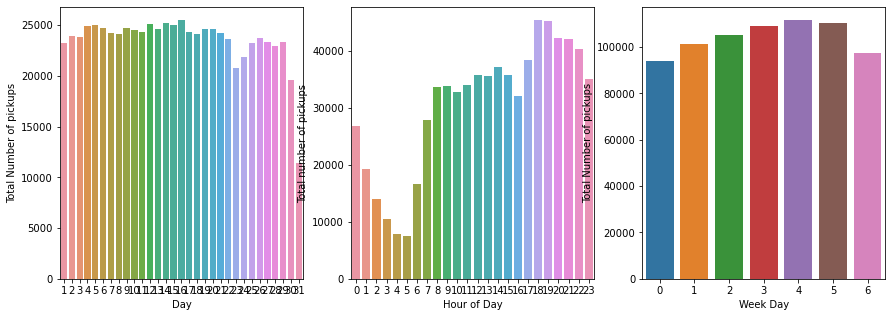

In [14]:
# extracting more features from the datetime variable

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

# Datetime features

plt.figure(figsize=(20, 5))

# Passenger Count

plt.subplot(141)
sns.countplot(df['pickup_day'])
plt.xlabel('Day')
plt.ylabel('Total Number of pickups')

# vendor_id

plt.subplot(142)
sns.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

# Passenger Count

plt.subplot(143)
sns.countplot(df['pickup_weekday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

In [15]:
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2


In [17]:
def calculate_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    start_coords = (pickup_lat, pickup_long)
    stop_coords = (dropoff_lat, dropoff_long)
    
    return great_circle(start_coords,stop_coords).km


In [18]:
df['distance'] = df.apply(lambda x: calculate_distance(x['pickup_latitude'],
                                                       x['pickup_longitude'],
                                                       x['dropoff_latitude'],
                                                       x['dropoff_longitude']), axis=1)

In [19]:
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2,4.328540


In [20]:
df['distance'].value_counts()

0.000000    2901
0.000424      20
0.000424      19
0.000424      16
0.000424      11
            ... 
2.929161       1
0.977650       1
0.925223       1
4.112012       1
5.945846       1
Name: distance, Length: 726243, dtype: int64

Text(0, 0.5, 'Frequency')

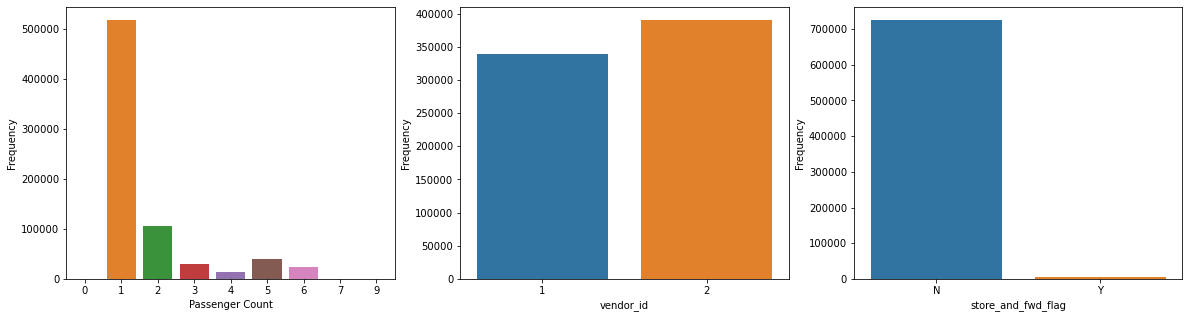

In [21]:
# Binary Features

plt.figure(figsize=(20, 5))

# Passenger Count

plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

# vendor_id

plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag

plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

In [22]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [23]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [24]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [25]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2,4.328540


In [26]:
# checking the shape of the dataset now

df.shape

(729287, 19)

In [27]:
# trip duration in hour

df['trip_duration'].describe()/3600


count    202.579722
mean       0.264515
std        1.073531
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

In [28]:
# trip duration in hours

df['trip_duration_in_hour'] = df['trip_duration'].apply(lambda x : x/3600)

In [29]:
# removing outliers considering trips are not supposed to exceed a day(24 hours)

df = df[df['trip_duration_in_hour']<=24]

In [30]:
df['trip_duration_in_hour'].min(), df['trip_duration_in_hour'].max()

(0.0002777777777777778, 23.9975)

<AxesSubplot:xlabel='trip_duration_in_hour', ylabel='distance'>

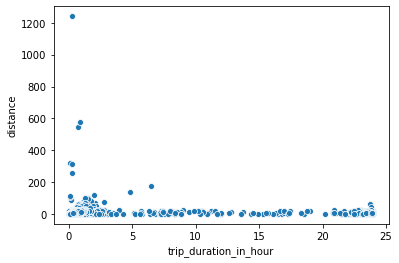

In [31]:
sns.scatterplot(y=df['distance'],x='trip_duration_in_hour',data=df, legend=False)

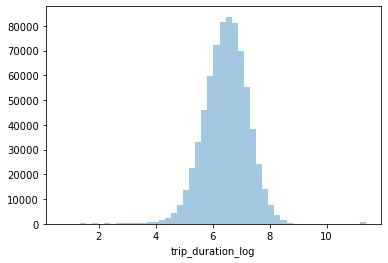

In [32]:
# after log transform of trip duration in seconds

df['trip_duration_log'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['trip_duration_log'], kde = False)
plt.show()

In [33]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance,trip_duration_in_hour,trip_duration_log
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,29,16,0,29,16,0,1.199074,0.111111,5.993961
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,0,11,23,4,11,23,4,4.129117,0.305556,7.003974
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,0,21,17,6,21,18,6,7.250763,0.454167,7.400010
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,0,5,9,1,5,10,1,2.361101,0.316944,7.040536
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,0,17,6,2,17,6,2,4.328540,0.235556,6.744059


In [34]:
df1 = df.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude',
 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
 'trip_duration_in_hour'])
df1.head(2)

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance,trip_duration_log
0,2,1,0,29,16,0,29,16,0,1.199074,5.993961
1,1,2,0,11,23,4,11,23,4,4.129117,7.003974


In [35]:
X = df1.drop('trip_duration_log', axis=1)
y = df1['trip_duration_log']

In [36]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

X = pd.DataFrame(x_scaled, columns=X.columns)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=54)

In [38]:
# creating train and test set for benchmark model

benchmark_train = pd.concat([X_train, y_train], axis=1, join="inner")
benchmark_test = pd.concat([X_test, y_test], axis=1, join="inner")

In [39]:
benchmark_train.head()

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance,trip_duration_log
189867,0.0,0.0,0.0,0.833333,0.782609,0.166667,0.833333,0.782609,0.166667,0.001865,5.899897
342791,1.0,0.0,0.0,0.000000,0.521739,1.000000,0.000000,0.521739,1.000000,0.001186,7.483807
637337,1.0,0.0,0.0,0.366667,0.000000,0.833333,0.366667,0.000000,0.833333,0.000653,7.418781
553981,0.0,0.6,0.0,0.966667,0.521739,0.333333,0.966667,0.521739,0.333333,0.002105,6.371612
139839,0.0,0.0,0.0,0.466667,0.000000,0.166667,0.466667,0.000000,0.166667,0.001521,6.542472


In [40]:
benchmark_test.head()

,vendor_id,passenger_count,store_and_fwd_flag_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,distance,trip_duration_log
543255,0.0,0.0,0.0,0.700000,0.000000,0.666667,0.700000,0.043478,0.666667,0.001936,7.568896
652996,1.0,0.0,0.0,0.266667,0.695652,0.166667,0.266667,0.695652,0.166667,0.003145,6.287859
699689,0.0,0.0,0.0,0.133333,0.739130,1.000000,0.133333,0.739130,1.000000,0.003443,6.705639
337695,0.0,0.0,0.0,0.866667,0.608696,0.000000,0.866667,0.608696,0.000000,0.000680,6.725034
419266,0.0,0.0,0.0,1.000000,0.652174,1.000000,1.000000,0.695652,1.000000,0.003622,6.109248


In [41]:
# the predicted value here is substituted with the mean of target

benchmark_test['simple_mean'] = benchmark_train['trip_duration_log'].mean()

In [42]:
# error in simple mean model

error = sqrt(mean_squared_error(benchmark_test['trip_duration_log'], benchmark_test['simple_mean']))
             
print("r-squared score of simple mean model: ", error)

r-squared score of simple mean model:  0.7940371701069622


In [43]:
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

y_pred = knnr.predict(X_test)
error = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", error)

RMSE of knn model:  0.5676636400967733


In [44]:
def elbow(k):
    test = []
    
    for i in k:
        reg = KNeighborsRegressor(n_neighbors=i)
        reg.fit(X_train, y_train)
        
        tmp_pred = reg.predict(X_test)
        temp_error = sqrt(mean_squared_error(tmp_pred, y_test))
        
        test.append(temp_error)
    return test


In [45]:
k = range(1, 10)
test = elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

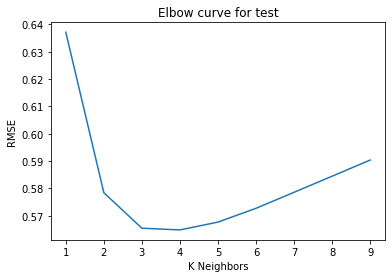

In [46]:
# plotting the curve

plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('RMSE')
plt.title('Elbow curve for test')

In [47]:
test

[0.6371545879942028,
 0.5784142926882597,
 0.5654232428230324,
 0.564799907741019,
 0.5676636400967733,
 0.5727123485981427,
 0.5785727470424491,
 0.5844613859081943,
 0.5903712782450261]

In [48]:
# re-checking the error after changing n_neighbors to 4

knnr = KNeighborsRegressor(n_neighbors=4)
knnr.fit(X_train, y_train)

y_pred = knnr.predict(X_test)
knn_test_rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", knn_test_rmse)

RMSE of knn model:  0.564799907741019


In [49]:
y_pred = knnr.predict(X_train)
knn_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of knn model: ", knn_train_rmse)

RMSE of knn model:  0.4218432864780257


In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
lm_test_rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of linear regressor model: ", lm_test_rmse)

RMSE of linear regressor model:  0.6302309525385698


In [51]:
y_pred = lr.predict(X_train)
lm_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of linear regressor model: ", lm_train_rmse)

RMSE of linear regressor model:  0.6608831278934574


In [52]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
dtr_test_rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of decision tree regressor model: ", dtr_test_rmse)

RMSE of decision tree regressor model:  0.6252456671086524


In [53]:
y_pred = dtr.predict(X_train)
dtr_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of decision tree regressor model: ", dtr_train_rmse)

RMSE of decision tree regressor model:  0.02991276569606781


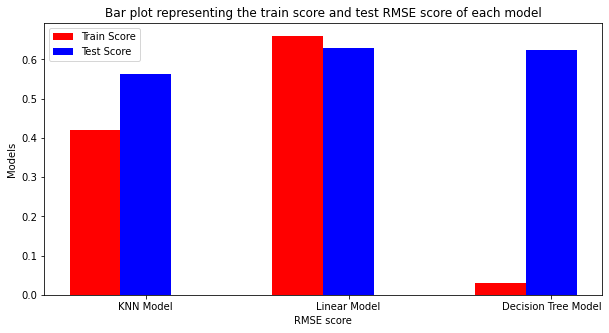

In [54]:
# Declaring the figure or the plot (y, x) or (width, height)

plt.figure(figsize=[10, 5])
train_scores = [0.421, 0.660, 0.029]
test_scores = [0.564, 0.630, 0.625]

# Passing the parameters to the bar function

# Using X now to align the bars side by side

X = np.arange(len(train_scores))

# Passing the parameters to the bar function, this is the main function which creates the bar function

# Using X now to align the bars side by side

plt.bar(X, train_scores, color = 'r', width = 0.25)
plt.bar(X + 0.25, test_scores, color = 'b', width = 0.25)

# Creating the legend of the bars in the plot

plt.legend(['Train Score', 'Test Score'])
labels = ['KNN Model', 'Linear Model', 'Decision Tree Model']

# Overiding the x axis with the country names

plt.xticks([i + 0.25 for i in range(3)], labels)

# Giving the tilte for the plot

plt.title("Bar plot representing the train score and test RMSE score of each model")

# Namimg the x and y axis

plt.xlabel('RMSE score')
plt.ylabel('Models')

# Displaying the bar plot

plt.show()